# Question 1: Shoe store



---


Answers:



1.   The calculation of average order value is incorrect, as we are naively calculating an average without considering the spread of the data. There are many extreme values that are skewing the data, and thus increasing the value of the metric we are considering. 
2.   Instead of looking at average order value, considering the median is a better use of time, as this metric is not influenced by extreme points.
3.   The median order value is $284, which is a more reasonable measure than the previously calculated $3,145.13 average order value. 






Detailed observations can be found within the code.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sneaker_shops = pd.read_csv('challenge_dataset.csv')

In [4]:
sneaker_shops.head(20)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
5,6,58,882,138,1,credit_card,2017-03-14 15:25:01
6,7,87,915,149,1,cash,2017-03-01 21:37:57
7,8,22,761,292,2,cash,2017-03-08 2:05:38
8,9,64,914,266,2,debit,2017-03-17 20:56:50
9,10,52,788,146,1,credit_card,2017-03-30 21:08:26


Naive calculation - We can compute average order value = total revenue / number of orders


In [5]:
total_revenue = sneaker_shops['order_amount'].sum()
num_orders = sneaker_shops['order_amount'].count()

avg_order_value = total_revenue / num_orders
print(avg_order_value)

3145.128


Our naive calculation gives an average order value of $3145.13, which seems extremely high.


Visualizing order_amount per each order_id displays the outliers. 

Text(0, 0.5, 'order_amount')

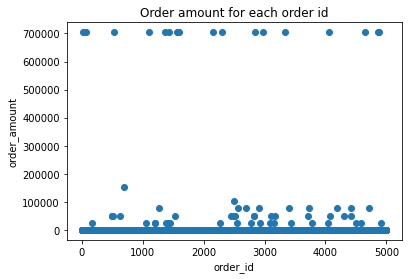

In [6]:
plt.scatter(x='order_id', y='order_amount', data=sneaker_shops)
plt.title('Order amount for each order id')
plt.xlabel('order_id')
plt.ylabel('order_amount')

Most orders are under $100,000, with the exception of extreme values, where there are many orders of $700,000.

We can take a look at descriptive statistics of order_amount.

In [7]:
sneaker_shops[['order_amount']].describe()

,order_amount
count,5000.000000
mean,3145.128000
std,41282.539349
min,90.000000
25%,163.000000
50%,284.000000
75%,390.000000
max,704000.000000


Once again, the mean order value is $3,145.13. The extremely large standard deviation of $41,282.54 indicates there is a large spread of values among the data. Another indication that the average order value metric is not an effective calculation for this data is the max order amount of $704,000. This seems like an extreme value. We can look into this further. 

In [7]:
sneaker_shops[['order_amount','total_items']].describe()

,order_amount,total_items
count,5000.000000,5000.00000
mean,3145.128000,8.78720
std,41282.539349,116.32032
min,90.000000,1.00000
25%,163.000000,1.00000
50%,284.000000,2.00000
75%,390.000000,3.00000
max,704000.000000,2000.00000


Looking at the statistics of order amount and total items ordered, we see that a max of 2000 items were ordered in one order. This skews the data a lot, since there are many orders in which a large number of shoes were bought, leading to a larger order amount.

In [16]:
sneaker_shops.groupby('order_amount').size()

order_amount
90        18
94        25
101       15
111       16
112       48
          ..
51450     16
77175      9
102900     1
154350     1
704000    17
Length: 258, dtype: int64

The order amount varies from anywhere between $90 to $704,000 for a single order. Grouping by total number of items also gives more information.

In [9]:
sneaker_shops.groupby('total_items').size()

total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
dtype: int64

Most orders contain 5 or fewer items, with a few containing 6 and 8 items. However, there are 17 orders which contain 2000 sneakers. This extreme outlier is negatively affecting the average order value by increasing its value.

Next, grouping by user_id, shop_id, and order_amount points out another odd observation. 

In [10]:
sneaker_shops.groupby(['user_id', 'shop_id', 'order_amount']).size().sort_values

<bound method Series.sort_values of user_id  shop_id  order_amount
607      42       704000          17
700      2        188              1
         4        384              1
         11       184              1
         34       122              1
                                  ..
999      87       298              2
         88       176              1
         90       534              1
         98       133              1
                  266              1
Length: 4848, dtype: int64>

The user with user_id 607 and shop_id 42 made 17 orders, totalling an order amount of $704,000, a possible error. The extreme orders belonging to user 607 is throwing off the average order value, so we must use a different statistic for a more accurate measure.

In [8]:
sneaker_shops.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Returning to the descriptive statistics, we see that the median order amount is $284.

In [12]:
sneaker_shops.groupby(['total_items', 'order_amount']).size().reset_index(name='count')

,total_items,order_amount,count
0,1,90,18
1,1,94,25
2,1,101,15
3,1,111,16
4,1,112,48
...,...,...,...
271,6,960,2
272,6,1086,1
273,6,154350,1
274,8,1064,1


Given that most orders contain 8 or fewer items (excluding the extremes), the median value of $284 is a good metric that is not affected by extreme values. 

# Question 2


---


1.   SELECT COUNT(1) \
     FROM Shippers s, Orders o \
     WHERE s.ShipperID = o.ShipperID\
     AND ShipperName = 'Speedy Express';

     54 orders were shipped by Speedy Express in total. 

2.   SELECT e.LastName, COUNT(e.EmployeeID) as num_orders \
     FROM Employees e \
     INNER JOIN Orders o ON e.EmployeeID = o.EmployeeID \
     GROUP BY e.LastName \
     ORDER BY COUNT(e.EmployeeID) DESC
     LIMIT 1; 

     The last name of the employee with the most orders is Peacock.

3.   SELECT p.ProductName, SUM(od.Quantity) as total \
     FROM OrderDetails od, Products p, Orders o, Customers c \
     WHERE od.ProductID = p.ProductID \
     AND o.OrderID = od.OrderID \
     AND o.CustomerID = c.CustomerID \
     AND c.Country = 'Germany' \
     GROUP BY p.ProductName \
     ORDER BY SUM(od.Quantity) DESC
     LIMIT 1;

     The product that was ordered the most by customers in Germany was Boston Crab Meat.



